# Sampling from a bivariate normal distibution

---



We implement a sampling method which randomly draws samples from a normal distribution and maps it to a set of samples in bivariate normal distribution using JAX, which is a NumPy-equivalent library which renders itself on the GPU and TPU as well, which facilitates high-performance machine learning research.

## **Mean Vector and the Covariance Matrix**
The mean vector and the covariance matrix are central to the our sampling method. A covariance matrix $\Sigma$, by definition, is symmetric and positive definite, which means $\boldsymbol{a}^\top\Sigma \boldsymbol{a}>0$ for all $\boldsymbol{a}\in {\mathbb R}^d$. A necessary and sufficient condition for $\Sigma$ to be positive definite is that all of its eigenvalues are positive.<br>
The mean vector, $μ$ is essentially the center of the distribution that result as the random samples from bivariate normal distribution. It's components $\mu_x$ and $\mu_y$ decribe the position of that center.

## **Sampling Process**
We here define a method `bivnormal_samples` which takes as arguments $X$ which is a samples from a normal distribution $N(0,I)$ as well as $mu$ (the mean vector) and $cov$ (the covariance matrix). It returns $x$ which is contains $N$ samples from a bivariate normal distribution. Below is the explanation of this sampling method :
1. ***Computing Cholesky Decomposition on Covariance Matrix***<br>
   Here, we look to compute the Cholesky decomposition given by the transformation $ Cov = LL^T $. 
   We implement this computationally using the `jnp.linalg.cholesky`function of the JAX library which successfully computes the Cholesky decomposition to return $L$.

2. ***Generating independent samples as: $\;X ∼ N(0,I)$***<br>

3. ***Compute $x = mean + L.u$*** <br>
   The variable $x$  has a bivariate normal distribution since is a linear combination of independent normally distributed variables.



## **Plot of the generated samples**
We use `matplotlib.pyplot` to produce a scatter plot of the smaples generated and we use `seaborn.jointplot()` to plot a `kde` plot of the samples. This is how we achieve the task at hand, though we could have added interactivity to the plot, but failed to do so given the time constraint.

---

## **Code :**

In [182]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [190]:
# dimensions of bivariate normal data
d = 2

# no of samples
n = 50000

# mean vector
u1 = 0
u2 = 0
mu = [[u1], [u2]]

In [183]:
# deviation values
sigx = 0.78
sigy = 1

# correlation between X and Y in the sampling
r = 1/5

# covariance matrix
covar = [[sigx**2,r*sigx*sigy],[r*sigx*sigy,sigy**2]]

# sampling from a normal distribution N(0,I) to convert it 
# into a bivariate normal distribution
X = np.random.normal(loc = 0,scale = 1, size=d * n).reshape(d,n)

In [185]:
# implementing a sampling method taking arguments from a normal distribution 
# to return samples from bivariate normal distribution

def bivnormal_samples(X,cov,mean):
  # Applying Cholesky decomposition on covariance matrix to get L
  L = jnp.linalg.cholesky(cov)

  # x is the array containing samples from a bivariate normal distribution
  x = mean + np.dot(L, X)
  
  return x

In [186]:
samples = bivnormal_samples(X,covar,mu)

### **Plots on the sampled data**

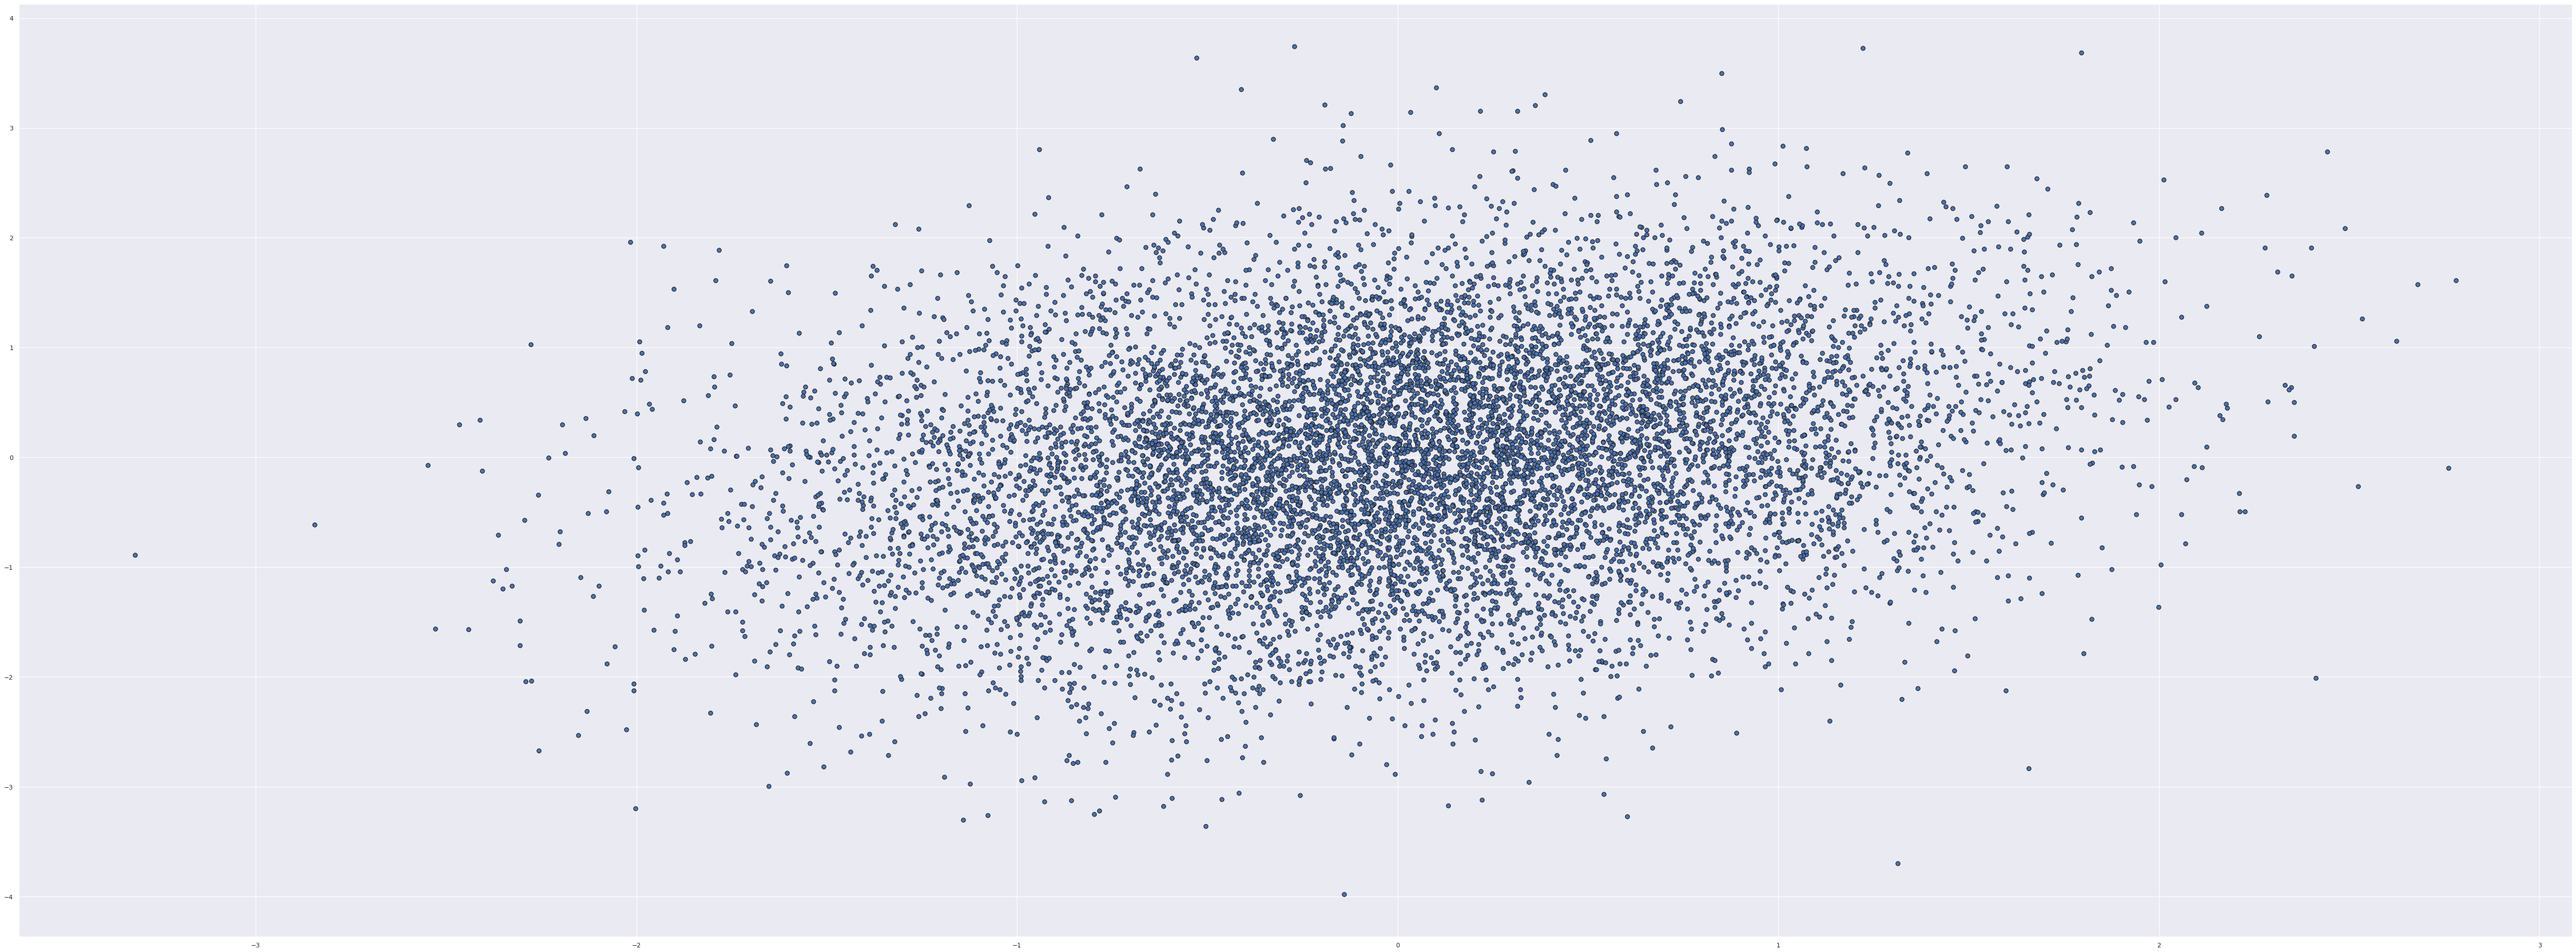

In [187]:
fig, ax = plt.subplots(figsize=(80, 30))
ax.scatter(samples[0], samples[1], s=55, facecolor='C0', edgecolor='k');

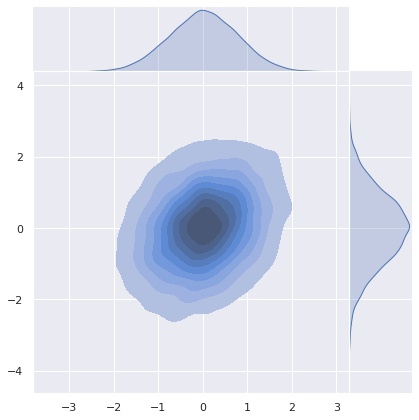

In [189]:
sns.jointplot(x = samples[0], y = samples[1], kind="kde", space = 0, fill=True)